In [1]:
import torch
import numpy as np

from utils import Model, ReshapeTransform

import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
path = "data/models/model_best_gamma.pth.tar"

In [3]:
vae = Model.load(path)
vae.eval()

In [4]:
test_mnist, _ = torch.load("data/processed/test.pt")

In [5]:
test_mnist[0].shape

torch.Size([28, 28])

In [6]:
def plot_mnist(x):
    plt.imshow(x, cmap='gray')
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


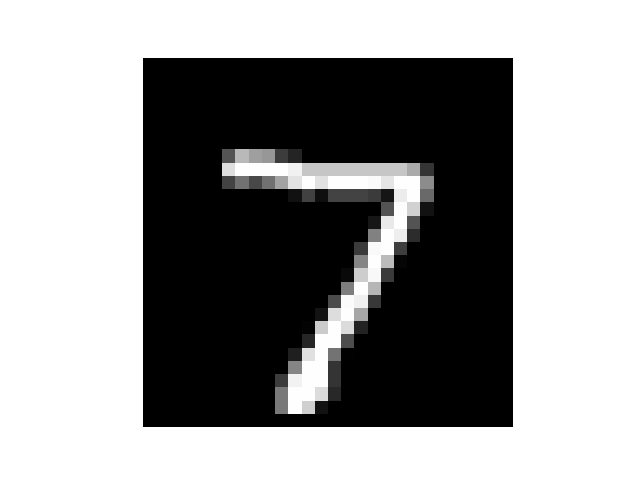

In [7]:
plot_mnist(test_mnist[0].numpy())

In [8]:
transform = ReshapeTransform((-1,))

In [9]:
number = transform(test_mnist[0])
number.shape

torch.Size([784])

In [10]:
number = number.float()/255.

In [11]:
z = vae.representation(number)
z

tensor([ 10.3246, 349.8875,   3.7433,  49.3126])

In [17]:
z = torch.FloatTensor([9.4027, 423.2446,   500.2517,  93.5338])

In [18]:
sample = vae.sample(z)

In [19]:
sample_np = sample.detach().numpy()

In [20]:
sample_np = np.array(sample_np*255, dtype='uint8').reshape((28, 28))

<IPython.core.display.Javascript object>


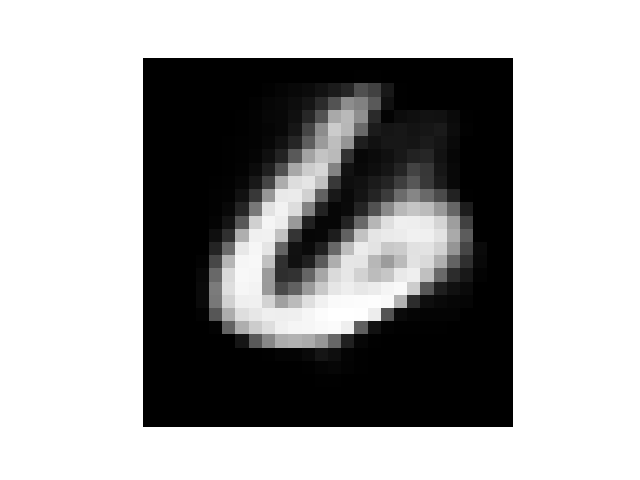

In [21]:
plot_mnist(sample_np)